### Linear Regression Assignment on Height and Weight Dataset 

#### Lests Begin 

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import warnings 
# from future.warnings('ignore')

import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Spatial Visualizations'''
import folium
import folium.plugins

In [2]:
# Read the dataset
data = pd.read_csv("new_height_weight.csv")

#### Inspecting our dataset for missing values or abnormalities

In [3]:
data.head(4)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470


In [4]:
data.tail(3)

,Height,Weight
9997,63.867992,128.475319
9998,69.034243,163.852461
9999,61.944246,113.649103


In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [7]:
data.isnull().sum()

Height    0
Weight    0
dtype: int64

In [8]:
data.isna().any()

Height    False
Weight    False
dtype: bool

<Axes: >

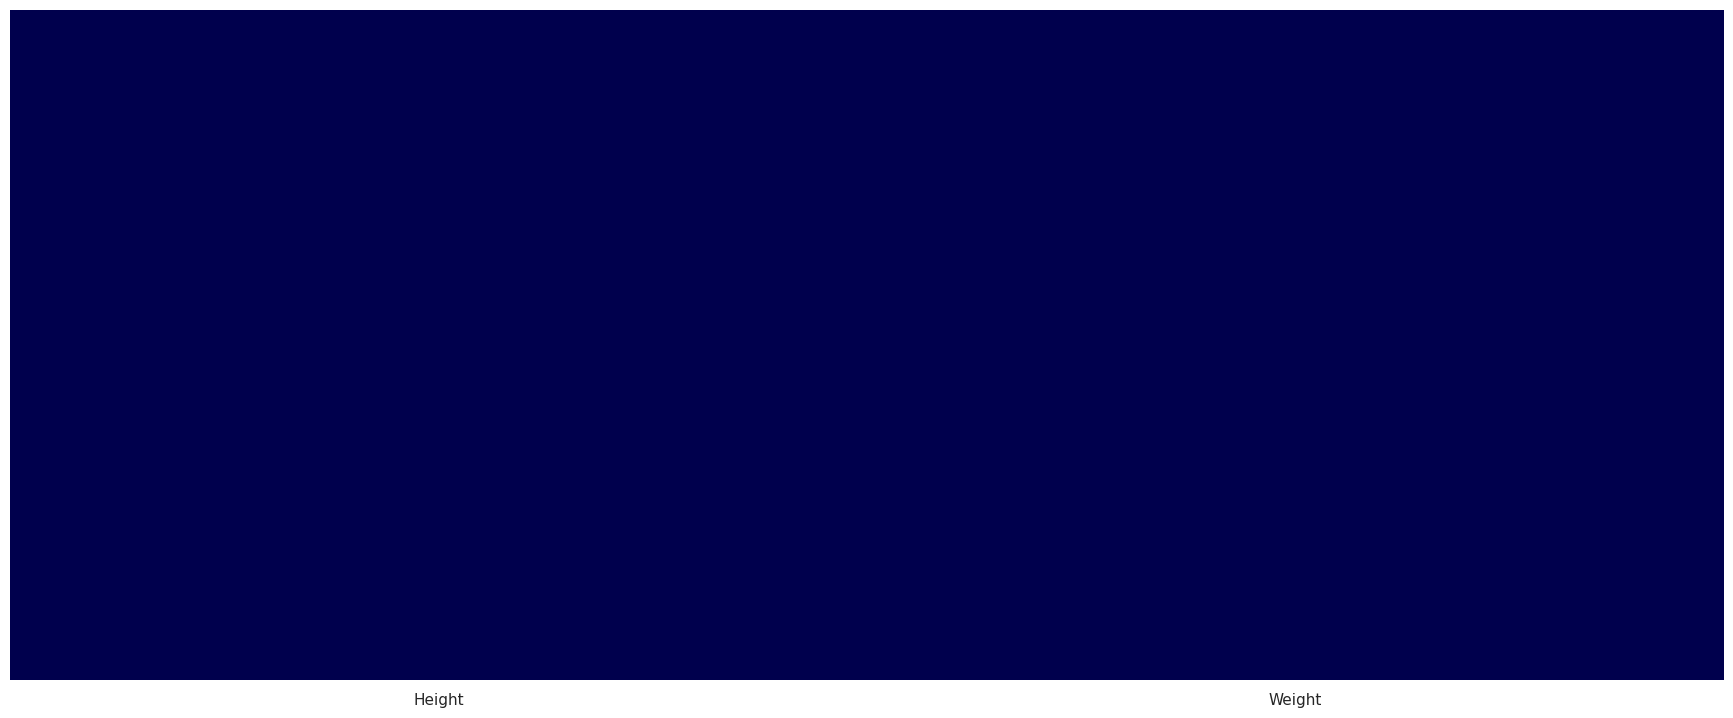

In [9]:
# Creating a heat map for the missing values

sns.set(rc = {'figure.figsize':(19.7,8.27)})

sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap ='seismic')

In [10]:
data.columns

Index(['Height', 'Weight'], dtype='object')

<Axes: xlabel='Height', ylabel='Weight'>

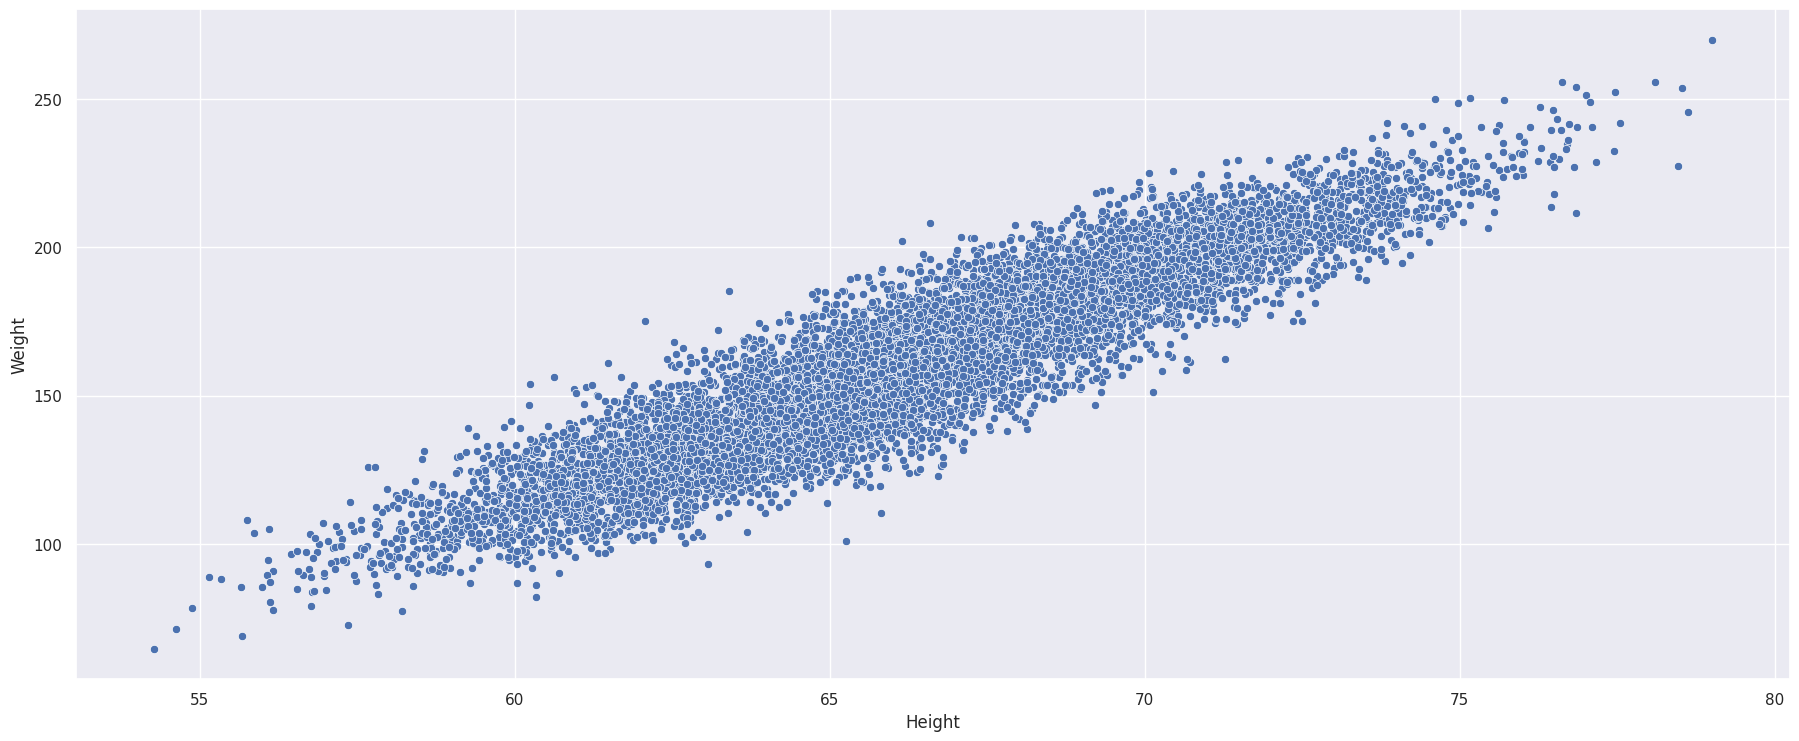

In [11]:
# Plotting a scatterplot for the brain vs the head size
sns.scatterplot(x = 'Height', y = 'Weight', data = data)

Our Data has only two columns, so we will just go ahead and train 

In [15]:
data2 = data.copy()

In [16]:
data2.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [17]:
X = data2.drop(['Weight'], axis= 1)

In [18]:
y = data2['Weight']

In [19]:
y.head(2)

0    241.893563
1    162.310473
Name: Weight, dtype: float64

### Splitting my data into Train and Testing Dataset

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [22]:
len(X_train)

7500

In [23]:
len(X_test)

2500

In [24]:
len(y_train)

7500

In [25]:
len(y_test)

2500

### Linear Regression Model

In [26]:
from sklearn import linear_model

In [27]:
# Preparing my model
lr_model = linear_model.LinearRegression(n_jobs = -1)

In [28]:
# Training my model
lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [29]:
predicts = lr_model.predict(X_test)
height_weight = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
height_weight.head()

,Actual Values,Predicted Values
0,173.115813,179.245510
1,195.162042,180.340016
2,170.217451,161.614184
3,215.049660,204.217142
4,182.721452,166.580421


In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
# Calculate MAE
mae = mean_absolute_error(y_test, predicts)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9.720990891996594


A low MAE Simply means better performance